**AIML Online Capstone - Pneumonia Detection Challenge**

* Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. 
* It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams.



**Pneumonia Detection Project**

* To build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, algorithm needs to automatically locate lung opacities on chest radiographs.
* Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box.





**Loading Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Uploading Files**
* This block will extract all the files to the current working directory. You should be seeing the list of all files inside the zip files as the output of this block after the final `!ls` command is executed. 

In [5]:
files_zip_path= "/content/drive/My Drive/cap/rsna-pneumonia-detection-challenge.zip"

import zipfile

# This extracts the filesto the current working directory
archive=zipfile.ZipFile(files_zip_path,'r')
archive.extractall()
!ls

 drive				        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 sample_data			        stage_2_train_images
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv


**Importing and installing required libraries**

In [6]:
# installing pydicom for processing *.dcm files
!pip3 install -q pydicom

     |████████████████████████████████| 35.1MB 114kB/s 


In [0]:
# importing libraries for loading images
import os
import glob
import pandas as pd

In [8]:
# checking current working directory
print('Current working directory:',os.getcwd())
# checking files and folders in current directory
print('Folder and Files in current directory:',os.listdir())

Current working directory: /content
Folder and Files in current directory: ['.config', 'stage_2_train_labels.csv', 'stage_2_detailed_class_info.csv', 'stage_2_test_images', 'drive', 'stage_2_sample_submission.csv', 'stage_2_train_images', 'GCP Credits Request Link - RSNA.txt', 'sample_data']


**load the images extracted from folder stage_2_train_images**

In [0]:
image_path='/content/stage_2_train_images'

In [0]:
# defining function to create metadata which will be list of pathname and *.dcm file

def load_metadata(path):
  metadata=glob.glob(path+'/' +'*.dcm') # glob is used to find pathname for dcm files
  return list(set(metadata))

# creating metadata
metadata=load_metadata(image_path)

In [11]:
# Reading csv file for Patient Id, Bounding Box co-ordinates and Target value
data_labels=pd.read_csv('stage_2_train_labels.csv')
data_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [12]:
# checking size of metadata
print('Size of metadata is:',len(metadata))

# checking first element of metadata 
print('First image in metadata is:',metadata[0])

Size of metadata is: 26684
First image in metadata is: /content/stage_2_train_images/d57aaee0-caa9-46ad-b0a1-d34bebf2a2bc.dcm


In [0]:
# Creating Copy of Dataset and adding additional column for File Path to Map images and Bounding Box File

import copy
import numpy as np
data_labels1=copy.deepcopy(data_labels)
data_labels1['PathName']=np.nan

In [14]:
data_labels1.head()

,patientId,x,y,width,height,Target,PathName
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,NaN


In [15]:
type(data_labels1)

pandas.core.frame.DataFrame

In [0]:
# to create bounding box we need to map data lables with images

# defining a function to create dictionary for mapping data_labels with images

def addition_path(data_labels1): 
  for i in range(len(data_labels1)):
    data_labels1['PathName'][i]=os.path.join(image_path,data_labels1['patientId'][i]+'.dcm')
  return data_labels1

In [17]:
data_labels1=addition_path(data_labels1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
data_labels1.drop(['patientId'],axis=1)

,x,y,width,height,Target,PathName
0,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/0004cfab-14fd-4e...
1,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/00313ee0-9eaa-42...
2,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/00322d4d-1c29-49...
3,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/003d8fa0-6bf1-40...
4,264.0,152.0,213.0,379.0,1,/content/stage_2_train_images/00436515-870c-4b...
...,...,...,...,...,...,...
30222,185.0,298.0,228.0,379.0,1,/content/stage_2_train_images/c1ec14ff-f6d7-4b...
30223,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/c1edf42b-5958-47...
30224,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/c1f6b555-2eb1-42...
30225,570.0,393.0,261.0,345.0,1,/content/stage_2_train_images/c1f7889a-9ea9-4a...


In [0]:
data_labels1.drop(data_labels1.index[data_labels1.Target==0],inplace=True)

In [0]:
data_labels1=data_labels1[['PathName','x','y','width','height']]

In [21]:
data_labels1.head()

,PathName,x,y,width,height
4,/content/stage_2_train_images/00436515-870c-4b...,264.0,152.0,213.0,379.0
5,/content/stage_2_train_images/00436515-870c-4b...,562.0,152.0,256.0,453.0
8,/content/stage_2_train_images/00704310-78a8-4b...,323.0,577.0,160.0,104.0
9,/content/stage_2_train_images/00704310-78a8-4b...,695.0,575.0,162.0,137.0
14,/content/stage_2_train_images/00aecb01-a116-45...,288.0,322.0,94.0,135.0


In [22]:
type(data_labels1)

pandas.core.frame.DataFrame

In [23]:
data_labels1.iloc[0]

PathName    /content/stage_2_train_images/00436515-870c-4b...
x                                                         264
y                                                         152
width                                                     213
height                                                    379
Name: 4, dtype: object

In [24]:
len(data_labels1)

9555

**Creating Dictionary**

In [25]:
data_labels1.iloc[0]

PathName    /content/stage_2_train_images/00436515-870c-4b...
x                                                         264
y                                                         152
width                                                     213
height                                                    379
Name: 4, dtype: object

In [0]:
label_data=data_labels1.groupby(['PathName'])[['x','y','width','height']].apply(lambda x:x.values.tolist()).to_dict()

In [27]:
x=label_data.get('/content/stage_2_train_images/32408669-c137-4e8d-bd62-fe8345b40e73.dcm')
x

[[273.0, 856.0, 234.0, 101.0],
 [702.0, 801.0, 249.0, 144.0],
 [300.0, 367.0, 226.0, 423.0],
 [706.0, 360.0, 232.0, 238.0]]

In [0]:
# creating metadata file for images with target value 1 (Cases diagnosed with Pneumonia)

def get_metadata(data_lab):
  new_metadata=list()
  for k in data_lab.keys():
    new_metadata.append(k)
  return new_metadata

In [0]:
metadata=get_metadata(label_data)

**Validating size of metadata vs label_data**

In [30]:
print('Size of metadata is:',len(metadata))
print('Size of data labels is:',len(label_data))

Size of metadata is: 6012
Size of data labels is: 6012


**from above output we can validate that all patient data labels have been grouped as per requirement**

**Plotting an image**

In [0]:
import matplotlib.pyplot as plt
import pydicom
import cv2

Original Image Size of DCM images is: 1024 x 1024


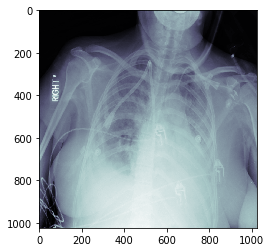

In [32]:
img=pydicom.dcmread(metadata[0])
if 'PixelData' in img:
    rows = int(img.Rows)
    cols = int(img.Columns)
    print("Original Image Size of DCM images is: {rows:d} x {cols:d}".format(rows=rows, cols=cols))
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()

In [33]:
img

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4475.1517874307.936345
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '000db696-cf54-4385-b10b-6b16fbb3f985'
(0010, 0020) Patient ID                          LO: '000db696-cf54-4385-b10b-6b16fbb3f985'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

**(0028,0002) Sample per Pixel**
* Sample per pixel defines the number of color channels which is set to 1 meaning image has single Gray Channel

In [0]:
# creating Bounding box on images

# finding number of times image exists in bounding box data file
def get_count(pathname,data_lab):
  count_label=0
  if pathname in label_data:
      count_label=len(data_lab.get(pathname))  
  return count_label

# function to get image
def get_image(pathname,met_data):
  for i in range(len(met_data)):
    if met_data[i]==pathname:
      img=pydicom.dcmread(met_data[i]) 
      imag=img.pixel_array
  return imag


# function to draw bounding Box on images
def get_bb(imag,data_lab):
  if pathname in data_lab:
    data= data_lab.get(pathname)
    count=len(data)
    for i in range(count):    
        x= int(data[i][0])
        y= int(data[i][1])                                                     
        w= int(data[i][2])
        h= int(data[i][3])
        bb=cv2.rectangle(imag,(x,y),(x+w,y+h),(255,0,0),3)
        plt.imshow(bb,cmap=plt.cm.bone)   

6
File path for accessing Image: /content/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm
Number of times Pateint Id exists in bounding box data: 2


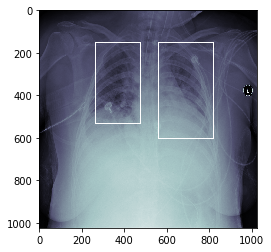

In [35]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm':
    print(i)

pathname=metadata[6]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[6])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

32
File path for accessing Image: /content/stage_2_train_images/01fa0f5e-00c3-41cb-b5c7-10600c8633ae.dcm
Number of times Pateint Id exists in bounding box data: 2


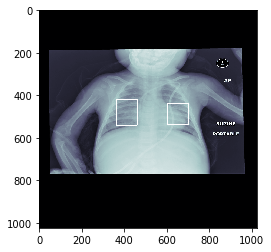

In [36]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/01fa0f5e-00c3-41cb-b5c7-10600c8633ae.dcm':
    print(i)

pathname=metadata[32]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[32])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

1011
File path for accessing Image: /content/stage_2_train_images/32408669-c137-4e8d-bd62-fe8345b40e73.dcm
Number of times Pateint Id exists in bounding box data: 4


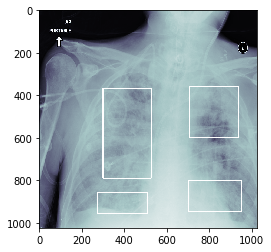

In [37]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/32408669-c137-4e8d-bd62-fe8345b40e73.dcm':
    print(i)

pathname=metadata[1011]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[1011])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

46
File path for accessing Image: /content/stage_2_train_images/02b7b018-0fed-44c2-a9c2-93b2b3952efc.dcm
Number of times Pateint Id exists in bounding box data: 3


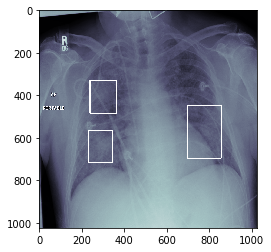

In [38]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/02b7b018-0fed-44c2-a9c2-93b2b3952efc.dcm':
    print(i)

pathname=metadata[46]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[46])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

**Resizing Image**

**Creating Dictionary**

In [0]:
import copy

Image_width=512
Image_height=512
Num_channels=1

Orig_width=1024
Orig_height=1024

def resize_label(data_lab):
  data=pd.DataFrame(columns=data_lab.columns)
  for i in range(len(data_lab)):
    data.loc[i]=[data_lab.iloc[i]['PathName'],int(data_lab.iloc[i]['x']*Image_width/Orig_width),int(data_lab.iloc[i]['y']*Image_height/Orig_height),int(data_lab.iloc[i]['width']*Image_width/Orig_width),int(data_lab.iloc[i]['height']*Image_height/Orig_height)]
    data.append(data.loc[i])
  return data


In [0]:
data_label=resize_label(data_labels1)

In [41]:
len(data_label)

9555

In [42]:
data_label.iloc[0]

PathName    /content/stage_2_train_images/00436515-870c-4b...
x                                                         132
y                                                          76
width                                                     106
height                                                    189
Name: 0, dtype: object

In [0]:

# function to resize images to build train,test and validation set
Image_width=512
Image_height=512
Num_channels=1

Orig_width=1024
Orig_height=1024

def resize_image(meta_data,data_lab):
  count=0
  for i in range(len(meta_data)):
    for a in range(len(data_lab)):
      if data_lab.iloc[a]['PathName']==meta_data[i]:
        count+=1
  cropped_images=np.zeros((count,Image_width,Image_height),dtype=np.float32)  
  for x in range(len(meta_data)):
    pathname=meta_data[x]
    img=pydicom.dcmread(pathname)
    img_pixel=img.pixel_array
    cropped_img=img_pixel[::2,::2]
    cropped_images[x]=cropped_img 
  return cropped_images         

In [0]:
metadata=data_label['PathName']

In [93]:
data_label.head(10)

,PathName,x,y,width,height
0,/content/stage_2_train_images/00436515-870c-4b...,132,76,106,189
1,/content/stage_2_train_images/00436515-870c-4b...,281,76,128,226
2,/content/stage_2_train_images/00704310-78a8-4b...,161,288,80,52
3,/content/stage_2_train_images/00704310-78a8-4b...,347,287,81,68
4,/content/stage_2_train_images/00aecb01-a116-45...,144,161,47,67
5,/content/stage_2_train_images/00aecb01-a116-45...,273,149,59,82
6,/content/stage_2_train_images/00c0b293-48e7-4e...,153,272,84,122
7,/content/stage_2_train_images/00c0b293-48e7-4e...,325,255,103,142
8,/content/stage_2_train_images/00f08de1-517e-46...,90,92,103,253
9,/content/stage_2_train_images/00f08de1-517e-46...,285,137,115,238


In [45]:
metadata.head()

0    /content/stage_2_train_images/00436515-870c-4b...
1    /content/stage_2_train_images/00436515-870c-4b...
2    /content/stage_2_train_images/00704310-78a8-4b...
3    /content/stage_2_train_images/00704310-78a8-4b...
4    /content/stage_2_train_images/00aecb01-a116-45...
Name: PathName, dtype: object

**Creating Training, Test and Validation Set**

*   Filename to access images
*   File for Bounding Box



In [0]:
# creating training dataset
train_dataset=metadata[0:int(round(len(metadata)*0.005))]
train_dataset.reset_index(drop=True,inplace=True)

In [0]:
# creating test dataset
test_dataset=metadata[int(round(len(metadata)*0.005)):int(round(len(metadata)*0.008))]
test_dataset.reset_index(drop=True,inplace=True)

In [0]:
# creating Validation dataset
validation_dataset=metadata[int(round(len(metadata)*0.008)):int(round(len(metadata)*0.001))]
validation_dataset.reset_index(drop=True,inplace=True)

In [49]:
print(f'Size of Training dataset:{len(train_dataset)}')
print(f'Size of Test dataset:{len(test_dataset)}')
print(f'Size of Validation dataset:{len(validation_dataset)}')

Size of Training dataset:48
Size of Test dataset:28
Size of Validation dataset:0


In [0]:
# creating resized images for training set
train_images=resize_image(train_dataset,data_label)

In [0]:
# creating resized images for test set
test_images=resize_image(test_dataset,data_label)

In [0]:
# creating resized images for vaidation set
validation_images=resize_image(validation_dataset,data_label)

In [53]:
print(f'Size of Training Images dataset:{len(train_images)}')
print(f'Size of Test Images dataset:{len(test_images)}')
print(f'Size of Validation Images dataset:{len(validation_images)}')

Size of Training Images dataset:92
Size of Test Images dataset:59
Size of Validation Images dataset:0


In [0]:
def get_target(meta_dat,data_lab):
  data=pd.DataFrame(columns=data_lab.columns)
  for i in range(len(meta_dat)):
    for a in range(len(data_lab)):
      if data_lab.iloc[a]['PathName']==meta_dat[i]:
        data=data.append(data_lab.iloc[a])
  return (data)

In [0]:
train_target=get_target(train_dataset,data_label)

In [0]:
train_target.drop(['PathName'],axis=1,inplace=True)

In [57]:
train_target.shape

(92, 4)

In [0]:
test_target=get_target(test_dataset,data_label)

In [0]:
test_target.drop(['PathName'],axis=1,inplace=True)

In [60]:
test_target.shape

(59, 4)

In [0]:
#validation_target=get_target(validation_dataset,label_data)

In [62]:
print(f'Size of Target variable for train dataset:{len(train_target)}')
print(f'Size of Test variable for test dataset:{len(test_target)}')
#print(f'Size of Validation variable for variable dataset:{len(validation_target)}')

Size of Target variable for train dataset:92
Size of Test variable for test dataset:59


**Validating Training Dataset by plotting Sample Images**

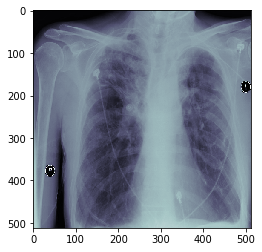

In [90]:
for i in range(len(train_dataset)):
  if train_dataset[i]=='/content/stage_2_train_images/02b7b018-0fed-44c2-a9c2-93b2b3952efc.dcm':
    print(f'Index value of the Give Image: {i}')
img=train_images[46]
plt.imshow(img,cmap=plt.cm.bone)

In [64]:
x_train = train_images.reshape(train_images.shape[0], Image_width, Image_height,Num_channels)
print(f'Shape of training variables:{x_train.shape}')

Shape of training variables:(92, 512, 512, 1)


In [65]:
y_train=np.array(train_target)
y_train.shape

(92, 4)

In [66]:
y_train[2]

array([132, 76, 106, 189], dtype=object)

In [67]:
x_test = test_images.reshape(test_images.shape[0], Image_width, Image_height,Num_channels)
print(f'Shape of test variables:{x_test.shape}')


Shape of test variables:(59, 512, 512, 1)


In [68]:
y_test=np.array(test_target)
y_test.shape

(59, 4)

In [69]:
import keras
from keras import Model
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,Callback
from keras.layers import Conv2D,Reshape,Dense,AveragePooling2D,Flatten,Activation
from keras.utils import Sequence
from keras.activations import softmax,sigmoid

Using TensorFlow backend.


In [0]:
def create_model(trainable=True):
  model=MobileNet(input_shape=(Image_width,Image_height,1), alpha=1.0,include_top=False, weights=None, input_tensor=None, pooling=None)

  for layer in model.layers:
    layer.trainable=trainable
    x=model.layers[-1].output
    x=Conv2D(4,kernel_size=16,name="bb")(x)
    x=Flatten()(x)
    x=Dense(4,activation='relu')(x)
    return Model(input=model.input,outputs=x)


In [71]:
model=create_model(False)
model.summary()












Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 513, 513, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


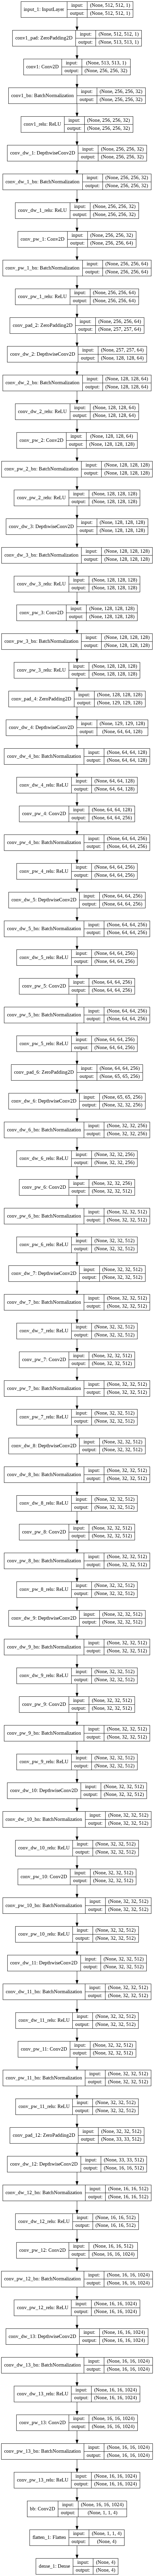

In [72]:
import keras
keras.utils.plot_model(model,show_shapes=True)

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from keras.backend import epsilon

In [0]:
def IOU(y_true,y_pred):

  area_true= y_true[0][2]*y_true[0][3]
  area_pred=y_pred[0][2]*y_pred[0][3]

  x1_true=y_true[0][0]
  x2_true=y_true[0][0]+y_true[0][2]

  y1_true=y_true[0][1]
  y2_true=y_true[0][1]+y_true[0][3]

  x1_pred=y_pred[0][0]
  x2_pred=y_pred[0][0]+y_pred[0][2]

  y1_pred=y_pred[0][1]
  y2_pred=y_Pred[0][1]+y_pred[0][3]

  x1_new=max(x1_true,x1_true)
  x2_new=min(x2_true,x2_pred)


  y1_new=max(y1_true,y1_pred)
  y2_new=min(y2_true,y2_pred)

  intersection_area= abs(max((x2_new-x1_new,0))*max((y2_new-y1_new,0)))

  area_true= y_true[0][2]*y_true[0][3]
  area_pred=y_pred[0][2]*y_pred[0][3]


  iou=intersection_area/(area_true+area_pred-intersection_area+epsilon())

  return iou

In [75]:
from keras.optimizers import Adam,rmsprop
optimizer=Adam()
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['acc'])

In [0]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/cap/capston+mobnetV1_weights.hdf5',monitor='val_loss',mode='min', verbose=1,save_weights_only=True, save_best_only=True)

In [0]:
stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.000000001)

In [79]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,verbose=1)



Train on 92 samples, validate on 59 samples
Epoch 1/2
92/92 [==============================] - 92s 1s/step - loss: 27587.4293 - acc: 0.2391 - val_loss: 19548.1667 - val_acc: 0.2881
Epoch 2/2
92/92 [==============================] - 81s 882ms/step - loss: 20245.7950 - acc: 0.3043 - val_loss: 20600.7499 - val_acc: 0.2881


In [0]:
import numpy as np

y_pred=model.predict(np.expand_dims(x_test[55],axis=0))

In [131]:
y_pred

array([[  0.      , 160.03185 ,  23.453861,  89.47979 ]], dtype=float32)